## This notebook is for putting all necessary input samples (K, Q, Inst freqs) into an input array, and the necessary output samples (tau1 and tau2) into an output array for our network to read and train upon. Here we also resample the inst freqs.

In [15]:
import numpy as np
from scipy.signal import resample
import matplotlib.pyplot as plt

In [32]:
ks = np.load('../20230721/20230731_ks.npy')
qs = np.load('../20230721/20230731_qs.npy')
tau1s = np.load('../20230721/20230731_tau1s.npy')
tau2s = np.load('../20230721/20230731_tau2s.npy')
instfreqs = np.load('../20230721/20230731_instfreqs.npy')

In [33]:
ks.shape

(10000,)

In [34]:
instfreqs.shape

(10000, 16000)

In [35]:
inputs = np.empty([10000, 200])
output_labels = np.empty([10000, 2])

In [36]:
inputs[:,1].shape #:, because we want to see all of the first dimension but just that ith row (i = 1) in this case

(10000,)

In [37]:
inputs[1,:].shape #example first column has 10k rows

(200,)

In [38]:
instfreqs.shape

(10000, 16000)

In [39]:
output_labels.shape

(10000, 2)

In [40]:
tau1s

array([[23.93448063],
       [ 7.86930308],
       [23.7320568 ],
       ...,
       [27.81136498],
       [14.71997992],
       [12.14461677]])

In [1]:
for i in range(10000):
    inputs[i,0] = ks[i]
    inputs[i,1] = qs[i]
    
    resampled_freqs = resample(instfreqs[i,:],199)[1:] #Resample inst freqs to have array fit NN input size
    new_freqs = np.interp(resampled_freqs, (resampled_freqs.min(), resampled_freqs.max()), (0,1)) #Normalize all inst freqs
    inputs[i,2:] = new_freqs
    
    output_labels[i,0] = tau1s[i]
    output_labels[i,1] = tau2s[i]
    
    

NameError: name 'ks' is not defined

In [42]:
#Using the inputs array as the source of data, make a histogram of the k and q values

Text(0, 0.5, 'Counts')

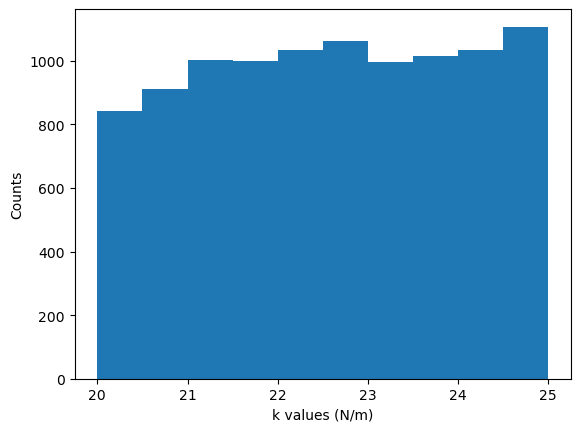

In [43]:
plt.hist(inputs[:,0])
plt.xlabel('k values (N/m)')
plt.ylabel('Counts')

Text(0, 0.5, 'Counts')

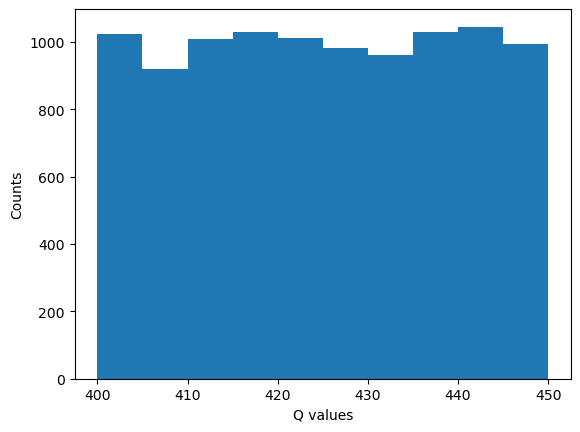

In [44]:
plt.hist(inputs[:,1])
plt.xlabel('Q values')
plt.ylabel('Counts')

In [45]:
np.save('input_array.npy',inputs)
np.save('output_array.npy',output_labels)